In [155]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

In [88]:
data_cluster = pd.read_csv('../data/clustering_result.csv')
data_feat    = pd.read_csv('../data/data_feat.csv')
data_cluster = data_cluster[['data_id', 'cluster_label']]

In [150]:
data_feat[10000:10100]

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,event_ctr_actor1_inter_7,event_ctr_actor1_inter_30,fatality_sum_actor1_inter_-30,fatality_sum_actor1_inter_-7,fatality_sum_actor1_inter_-3,fatality_sum_actor1_inter_-1,fatality_sum_actor1_inter_1,fatality_sum_actor1_inter_3,fatality_sum_actor1_inter_7,fatality_sum_actor1_inter_30
10000,9610113,231,ETH9324,9324,2022-11-01,2022,1,Battles,Non-state actor overtakes territory,OLF: Oromo Liberation Front (Shane Splinter Fa...,...,9.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0
10001,9610116,231,ETH9323,9323,2022-11-01,2022,1,Battles,Armed clash,OLF: Oromo Liberation Front (Shane Splinter Fa...,...,9.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0
10002,9610117,231,ETH9325,9325,2022-11-01,2022,1,Battles,Non-state actor overtakes territory,OLF: Oromo Liberation Front (Shane Splinter Fa...,...,9.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0
10003,9610119,231,ETH9326,9326,2022-11-01,2022,1,Explosions/Remote violence,Air/drone strike,Military Forces of Ethiopia (2018-),...,1.0,12.0,96.0,2.0,2.0,0.0,11.0,11.0,11.0,48.0
10004,9610121,231,ETH9322,9322,2022-11-01,2022,1,Battles,Armed clash,OLF: Oromo Liberation Front (Shane Splinter Fa...,...,9.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,9791202,768,TOG8734,8734,2022-11-01,2022,2,Violence against civilians,Attack,Military Forces of Togo (2005-),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10096,9794930,729,SUD18450,18450,2022-11-01,2022,1,Battles,Armed clash,SLM/A-Nur: Sudan Liberation Movement/Army (Abd...,...,0.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
10097,9838980,404,KEN10478,10478,2022-11-01,2022,1,Riots,Mob violence,Rioters (Kenya),...,6.0,49.0,23.0,3.0,1.0,1.0,0.0,1.0,3.0,36.0
10098,9609897,180,DRC27326,27326,2022-10-31,2022,1,Strategic developments,Other,MONUSCO: United Nations Organization Stabiliza...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
feat_col = ['data_id'] + [data_feat.columns[i] for i in range(31, 111)]
feat_col

['data_id',
 'event_ctr_-30',
 'event_ctr_-7',
 'event_ctr_-3',
 'event_ctr_-1',
 'event_ctr_1',
 'event_ctr_3',
 'event_ctr_7',
 'event_ctr_30',
 'fatality_sum_-30',
 'fatality_sum_-7',
 'fatality_sum_-3',
 'fatality_sum_-1',
 'fatality_sum_1',
 'fatality_sum_3',
 'fatality_sum_7',
 'fatality_sum_30',
 'event_ctr_admin1_-30',
 'event_ctr_admin1_-7',
 'event_ctr_admin1_-3',
 'event_ctr_admin1_-1',
 'event_ctr_admin1_1',
 'event_ctr_admin1_3',
 'event_ctr_admin1_7',
 'event_ctr_admin1_30',
 'fatality_sum_admin1_-30',
 'fatality_sum_admin1_-7',
 'fatality_sum_admin1_-3',
 'fatality_sum_admin1_-1',
 'fatality_sum_admin1_1',
 'fatality_sum_admin1_3',
 'fatality_sum_admin1_7',
 'fatality_sum_admin1_30',
 'event_ctr_admin2_-30',
 'event_ctr_admin2_-7',
 'event_ctr_admin2_-3',
 'event_ctr_admin2_-1',
 'event_ctr_admin2_1',
 'event_ctr_admin2_3',
 'event_ctr_admin2_7',
 'event_ctr_admin2_30',
 'fatality_sum_admin2_-30',
 'fatality_sum_admin2_-7',
 'fatality_sum_admin2_-3',
 'fatality_sum_admin

In [90]:
data_cluster = data_cluster.merge(data_feat[feat_col], on='data_id', how='left')
data_cluster['cluster_label'] = data_cluster['cluster_label'].astype('object')

In [91]:
data_cluster = data_cluster.set_index(['data_id', 'cluster_label'])


In [156]:
data_cluster.groupby('cluster_label').mean()

,event_ctr_-30,event_ctr_-7,event_ctr_-3,event_ctr_-1,event_ctr_1,event_ctr_3,event_ctr_7,event_ctr_30,fatality_sum_-30,fatality_sum_-7,fatality_sum_-3,fatality_sum_-1,fatality_sum_1,fatality_sum_3,fatality_sum_7,fatality_sum_30,event_ctr_admin1_-30,event_ctr_admin1_-7,event_ctr_admin1_-3,event_ctr_admin1_-1,event_ctr_admin1_1,event_ctr_admin1_3,event_ctr_admin1_7,event_ctr_admin1_30,fatality_sum_admin1_-30,...,event_ctr_actor1_30,fatality_sum_actor1_-30,fatality_sum_actor1_-7,fatality_sum_actor1_-3,fatality_sum_actor1_-1,fatality_sum_actor1_1,fatality_sum_actor1_3,fatality_sum_actor1_7,fatality_sum_actor1_30,event_ctr_actor1_inter_-30,event_ctr_actor1_inter_-7,event_ctr_actor1_inter_-3,event_ctr_actor1_inter_-1,event_ctr_actor1_inter_1,event_ctr_actor1_inter_3,event_ctr_actor1_inter_7,event_ctr_actor1_inter_30,fatality_sum_actor1_inter_-30,fatality_sum_actor1_inter_-7,fatality_sum_actor1_inter_-3,fatality_sum_actor1_inter_-1,fatality_sum_actor1_inter_1,fatality_sum_actor1_inter_3,fatality_sum_actor1_inter_7,fatality_sum_actor1_inter_30
cluster_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,964.421111,224.311222,96.605408,32.265858,32.121816,96.166482,216.874369,906.629252,4079.216111,1034.040354,510.148455,186.046332,188.484496,519.857936,1094.773976,4113.060658,13.048333,4.247098,2.230132,0.914506,0.915836,2.265816,4.312395,13.675170,454.740556,...,13.176871,616.268889,246.012714,150.166667,64.583563,64.051495,150.131521,243.084128,607.937075,6.005000,2.165837,1.273731,0.552675,0.527685,1.221976,1.994952,5.918367,528.859444,224.123273,138.224614,58.808053,58.273533,138.003885,221.249579,516.932540
0,1830.737087,429.662257,184.215642,61.677019,61.707975,184.236386,430.042312,1833.247560,3473.830955,807.105305,349.070015,116.315465,119.301641,353.484269,823.078114,3441.312027,39.947828,10.023837,4.461009,1.564190,1.572222,4.473111,10.045318,39.835652,137.425975,...,23.269497,301.511085,71.873928,31.812482,10.321469,11.495858,32.840316,74.260245,267.578377,14.410127,3.822144,1.777497,0.666388,0.666983,1.777820,3.824153,14.417792,270.387958,64.118962,28.247015,9.062429,10.414370,29.463919,66.803201,236.574888
1,1782.784906,418.099253,179.148951,60.180892,60.236347,179.379093,418.380516,1785.075505,3072.732473,723.051919,311.082164,104.000605,103.322776,308.206318,722.570248,3096.247680,20.853952,5.311170,2.386770,0.859225,0.860698,2.388976,5.313449,20.907520,48.897942,...,39.728921,55.357126,14.969888,7.246480,2.634017,2.484246,6.808422,14.833642,55.207517,25.521571,6.498551,2.825642,1.007354,1.007660,2.826820,6.504955,25.597872,28.353817,8.119221,4.059023,1.561902,1.532678,3.919661,8.028691,28.318003
2,1576.994395,370.342390,159.277068,53.848554,53.147590,157.407170,370.863187,1574.323484,2709.354901,627.360368,270.257386,89.949025,88.345842,266.347990,620.284495,2692.542198,19.606134,5.062363,2.280206,0.848240,0.825062,2.247443,5.042355,19.453013,9.909784,...,35.263983,2.900099,0.708227,0.327102,0.121318,0.152656,0.373430,0.736660,3.157721,30.098063,7.767541,3.430531,1.286573,1.285855,3.429917,7.766754,30.111006,1.406600,0.369155,0.171890,0.061376,0.081955,0.212715,0.391035,1.374537
3,1757.010066,414.801029,177.368527,60.262946,60.466779,178.059093,414.890034,1755.451452,2822.760429,654.685158,282.325914,94.965776,94.065996,280.575490,657.467749,2812.634113,19.509227,5.633934,2.811542,1.102785,1.125056,2.844544,5.631243,19.665310,2.177721,...,41.543461,6.975059,1.832905,0.911307,0.340342,0.402796,1.057303,2.043113,7.325195,15.604071,4.661783,2.429482,0.970809,0.971700,2.432457,4.669093,15.637843,1.831451,0.495582,0.243709,0.088693,0.098993,0.253274,0.489698,1.806149
4,2008.659876,472.515772,202.325964,68.495551,68.334682,202.504656,472.056209,2015.254565,3130.776848,732.331087,317.688056,105.890806,107.642125,316.730463,731.714633,3176.304443,5.880734,1.681046,0.831626,0.358587,0.331446,0.794439,1.627753,5.847915,8.175391,...,12.988008,6.538181,1.881100,0.852925,0.336074,0.417341,1.045350,2.059587,7.527392,4.15420

In [158]:
data_cluster_reshape = data_cluster.stack().reset_index()
data_cluster_reshape.columns = ['data_id', 'cluster_label', 'feature', 'result']
# rescale the result column
data_cluster_reshape['result'] = data_cluster_reshape.groupby('feature')['result'].transform(lambda x: x/(x.max()-x.min()))

### Level1: event counts

In [159]:
data_cluster_subset = data_cluster_reshape.loc[data_cluster_reshape.feature.str.match('^event_ctr_[-]?[0-9]{1,2}')]

<AxesSubplot:xlabel='feature', ylabel='result'>

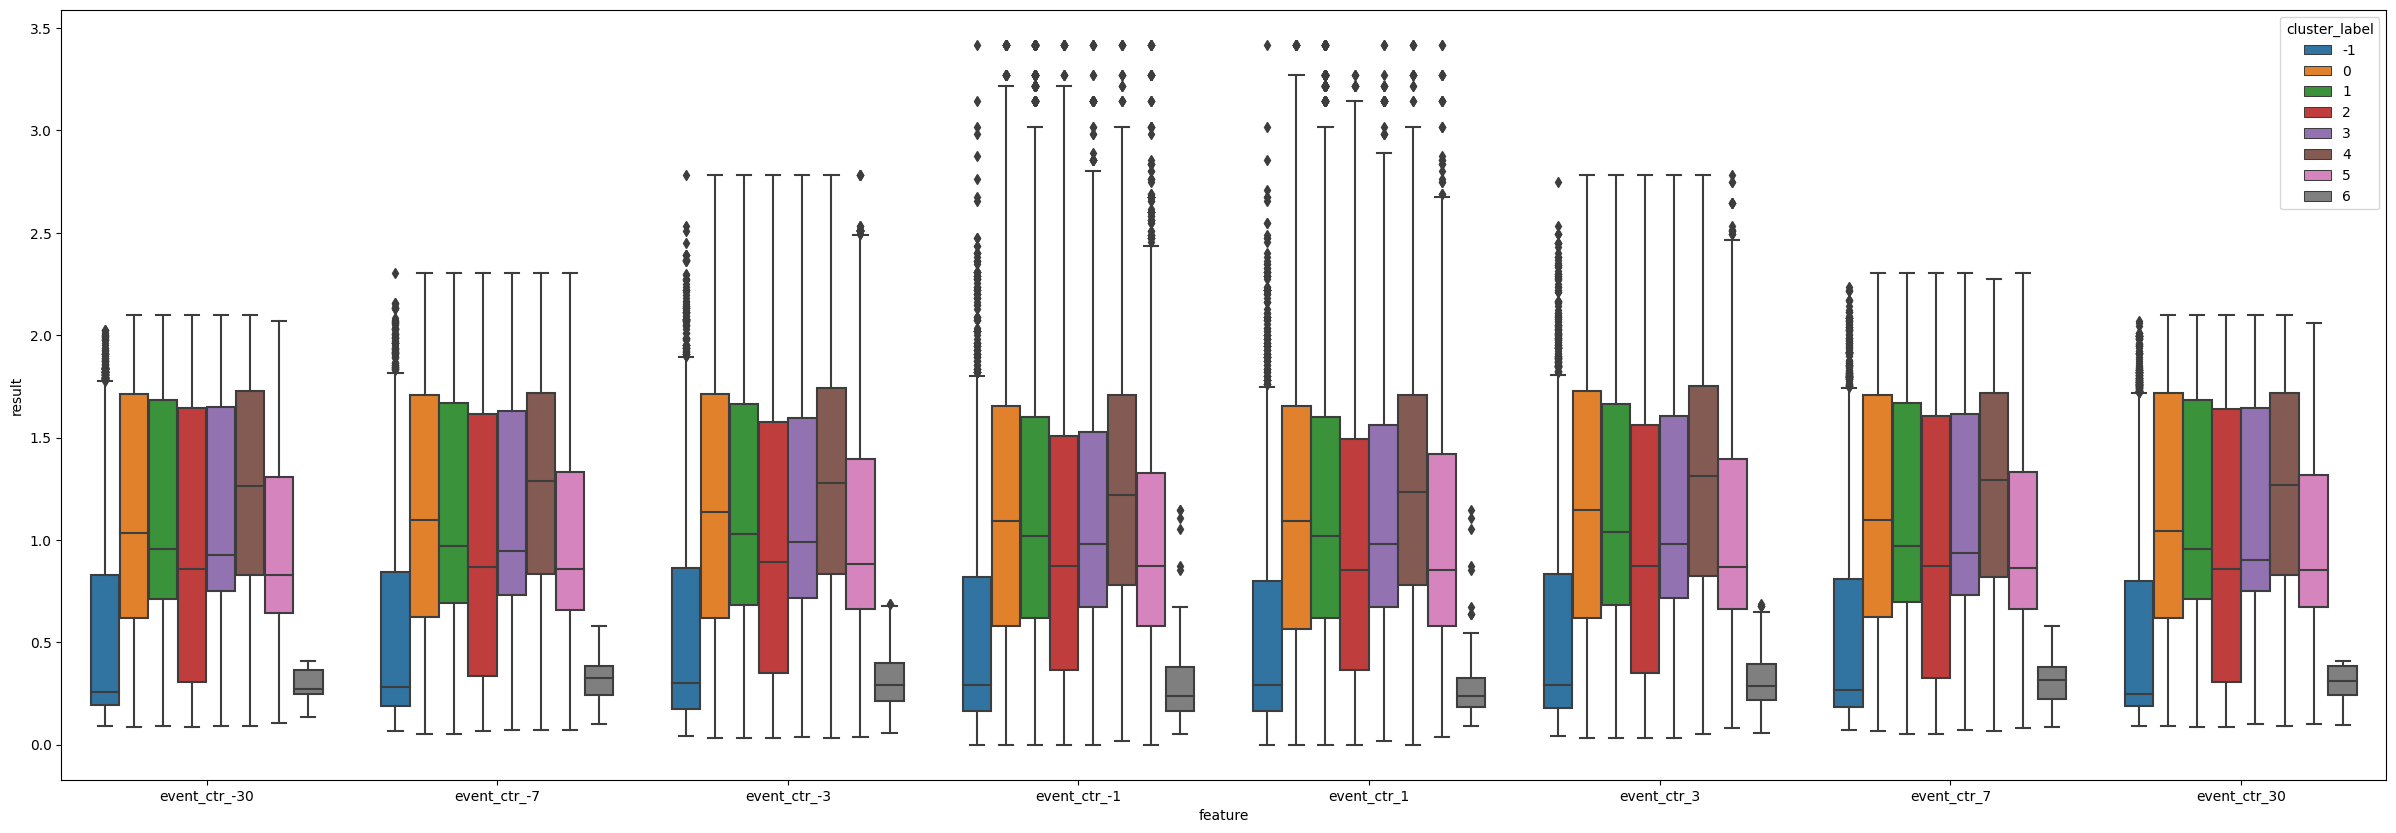

In [160]:
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.boxplot(data=data_cluster_subset, x='feature', y='result', hue= 'cluster_label', ax = ax)

### Level2: event counts admin1 

In [161]:
data_cluster_subset = data_cluster_reshape.loc[data_cluster_reshape.feature.str.match('^event_ctr_admin1_[-]?[0-9]{1,2}')]

<AxesSubplot:xlabel='feature', ylabel='result'>

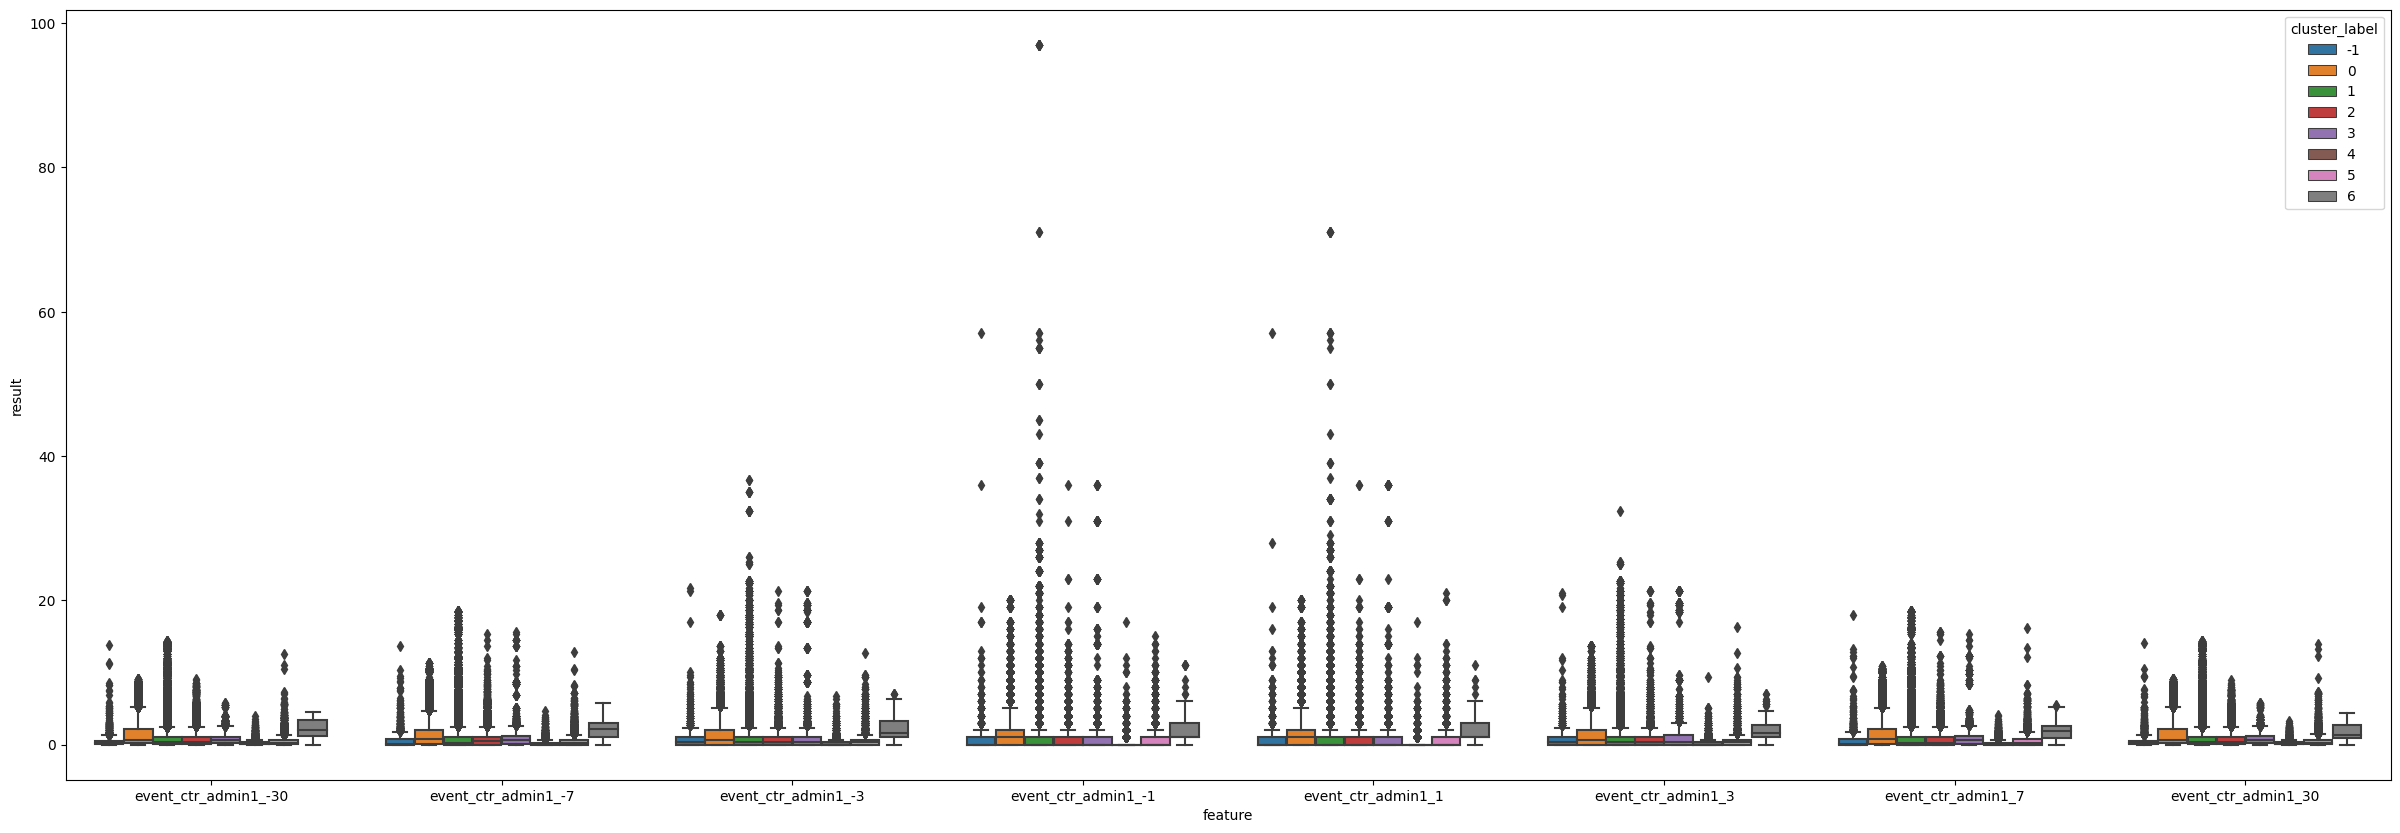

In [162]:
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.boxplot(data=data_cluster_subset, x='feature', y='result', hue= 'cluster_label', ax = ax)

### Level3: event counts admin2

In [163]:
data_cluster_subset = data_cluster_reshape.loc[data_cluster_reshape.feature.str.match('^event_ctr_admin2_[-]?[0-9]{1,2}')]

<AxesSubplot:xlabel='feature', ylabel='result'>

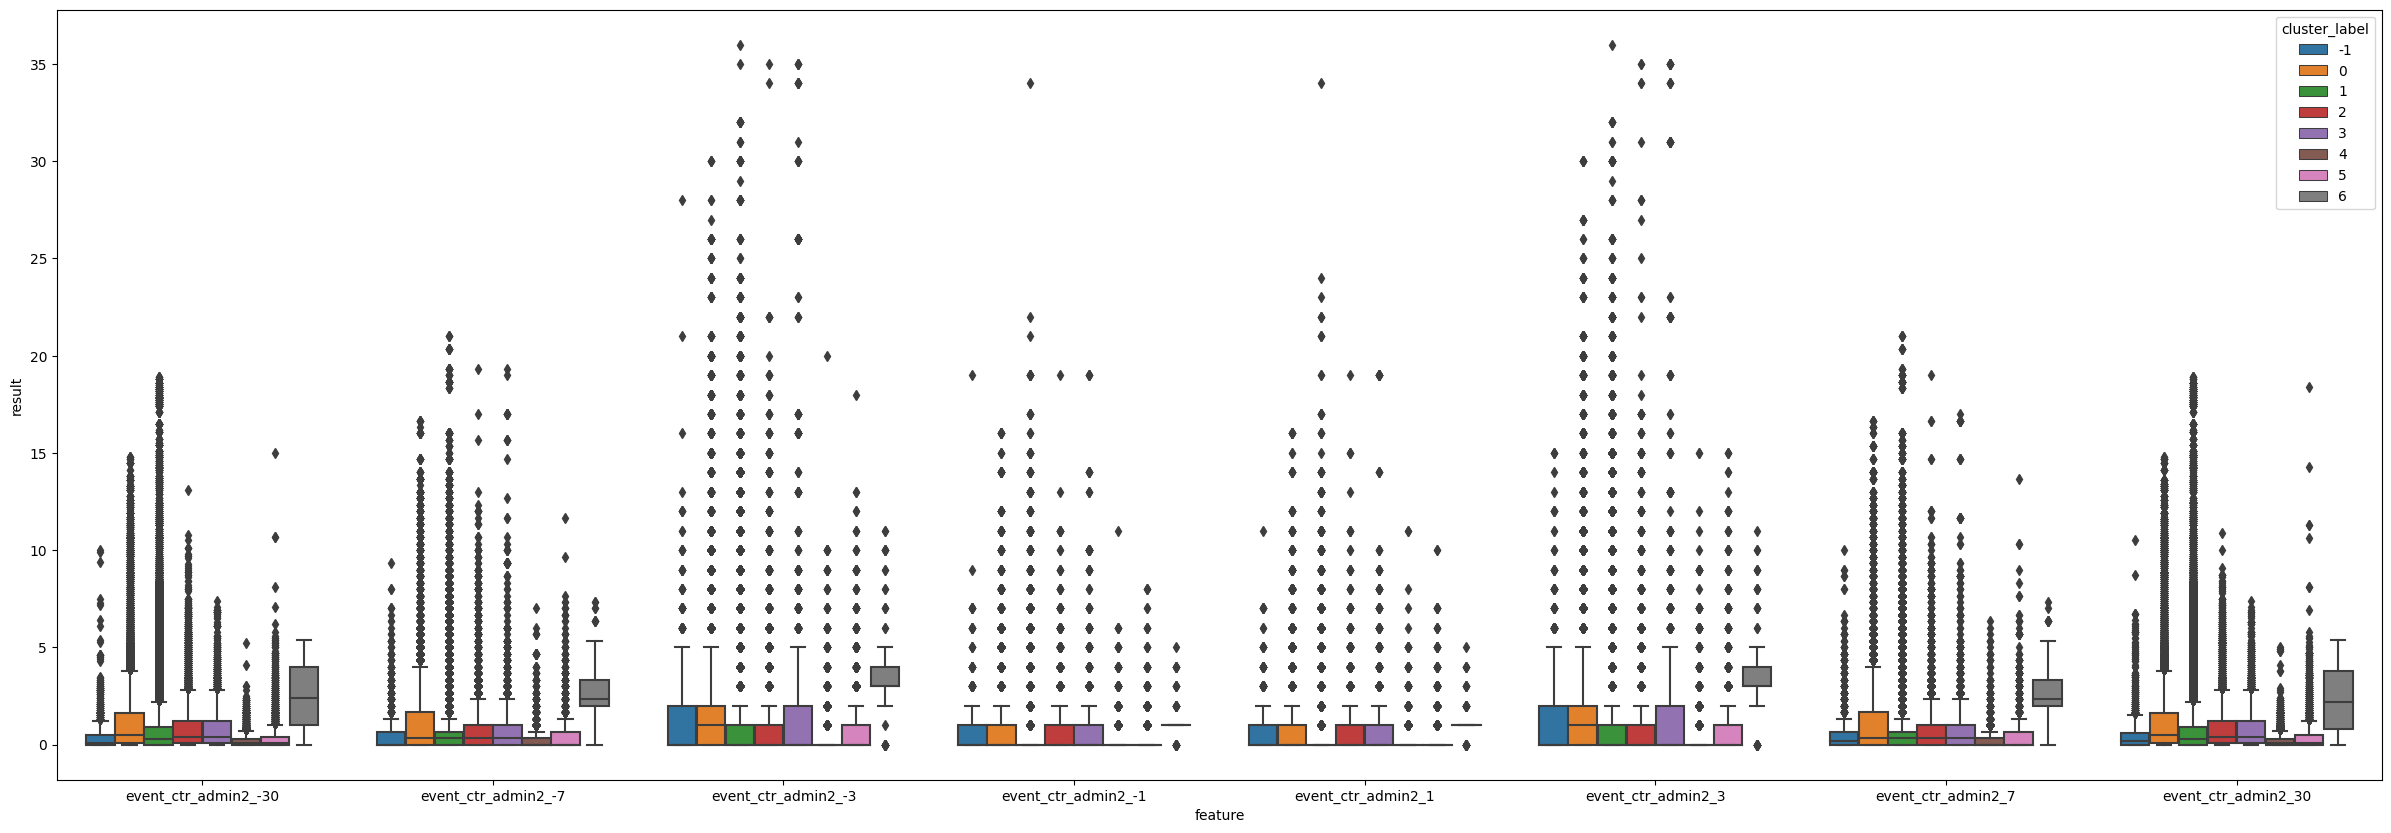

In [164]:
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.boxplot(data=data_cluster_subset, x='feature', y='result', hue= 'cluster_label', ax = ax)

### Level4: actor1

In [165]:
data_cluster_subset = data_cluster_reshape.loc[data_cluster_reshape.feature.str.match('^event_ctr_actor1_[-]?[0-9]{1,2}')]

<AxesSubplot:xlabel='feature', ylabel='result'>

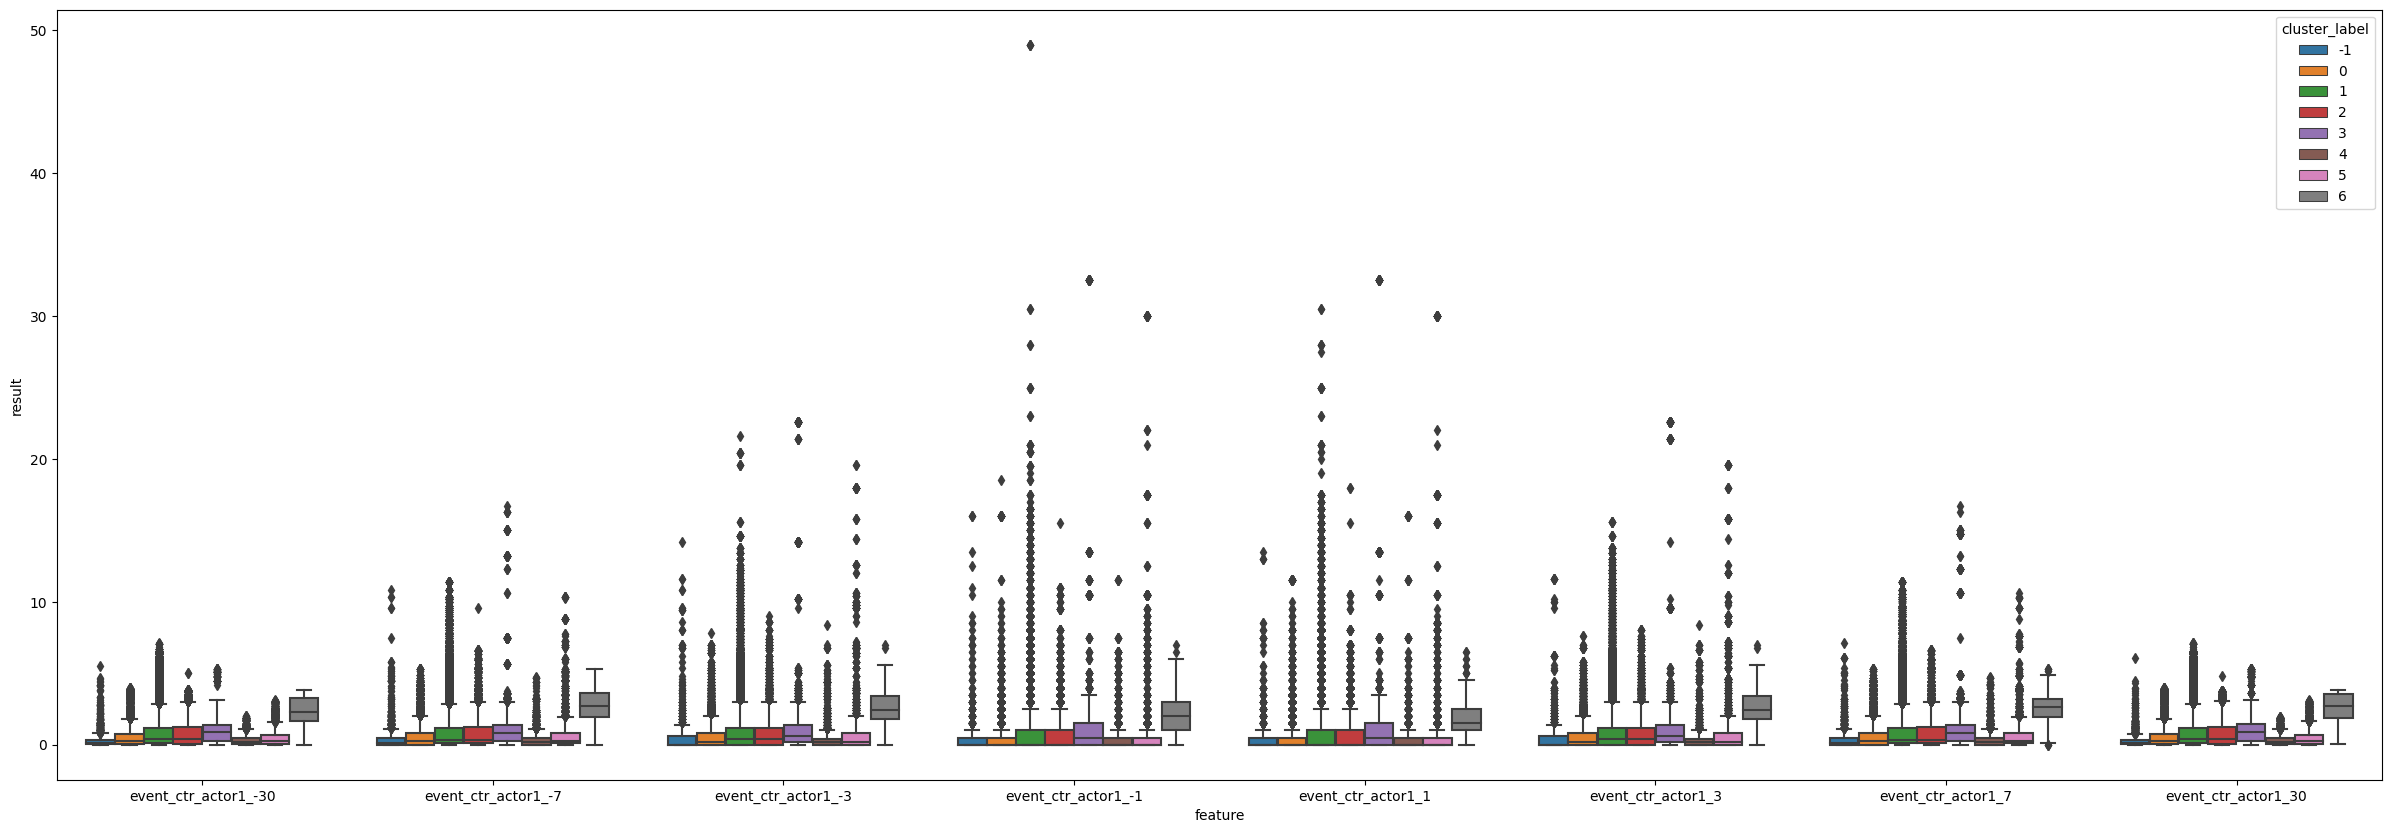

In [166]:
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.boxplot(data=data_cluster_subset, x='feature', y='result', hue= 'cluster_label', ax = ax)

### Level5: actor1 & interaction

In [167]:
data_cluster_subset = data_cluster_reshape.loc[data_cluster_reshape.feature.str.match('^event_ctr_actor1_inter_[-]?[0-9]{1,2}')]

<AxesSubplot:xlabel='feature', ylabel='result'>

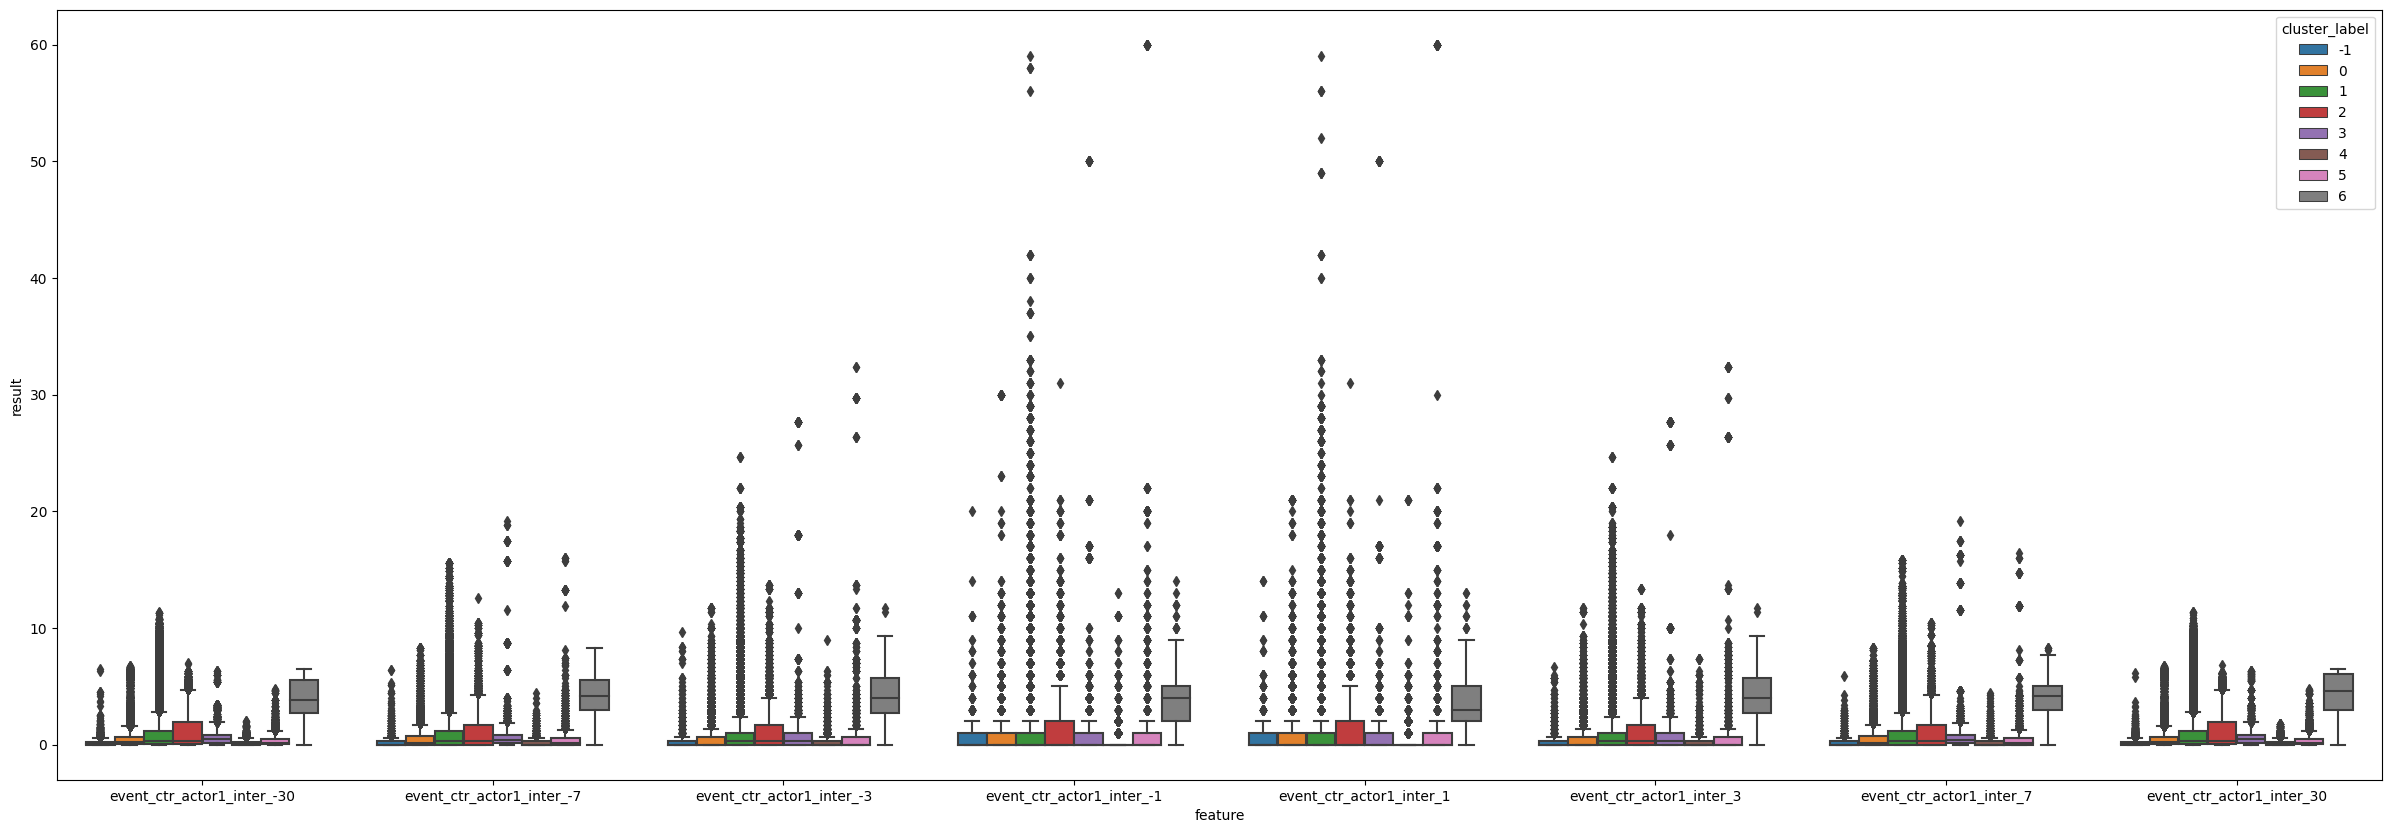

In [168]:
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.boxplot(data=data_cluster_subset, x='feature', y='result', hue= 'cluster_label', ax = ax)

### Level6: fatality sum 

In [169]:
data_cluster_subset = data_cluster_reshape.loc[data_cluster_reshape.feature.str.match('^fatality_sum_[-]?[0-9]{1,2}')]

<AxesSubplot:xlabel='feature', ylabel='result'>

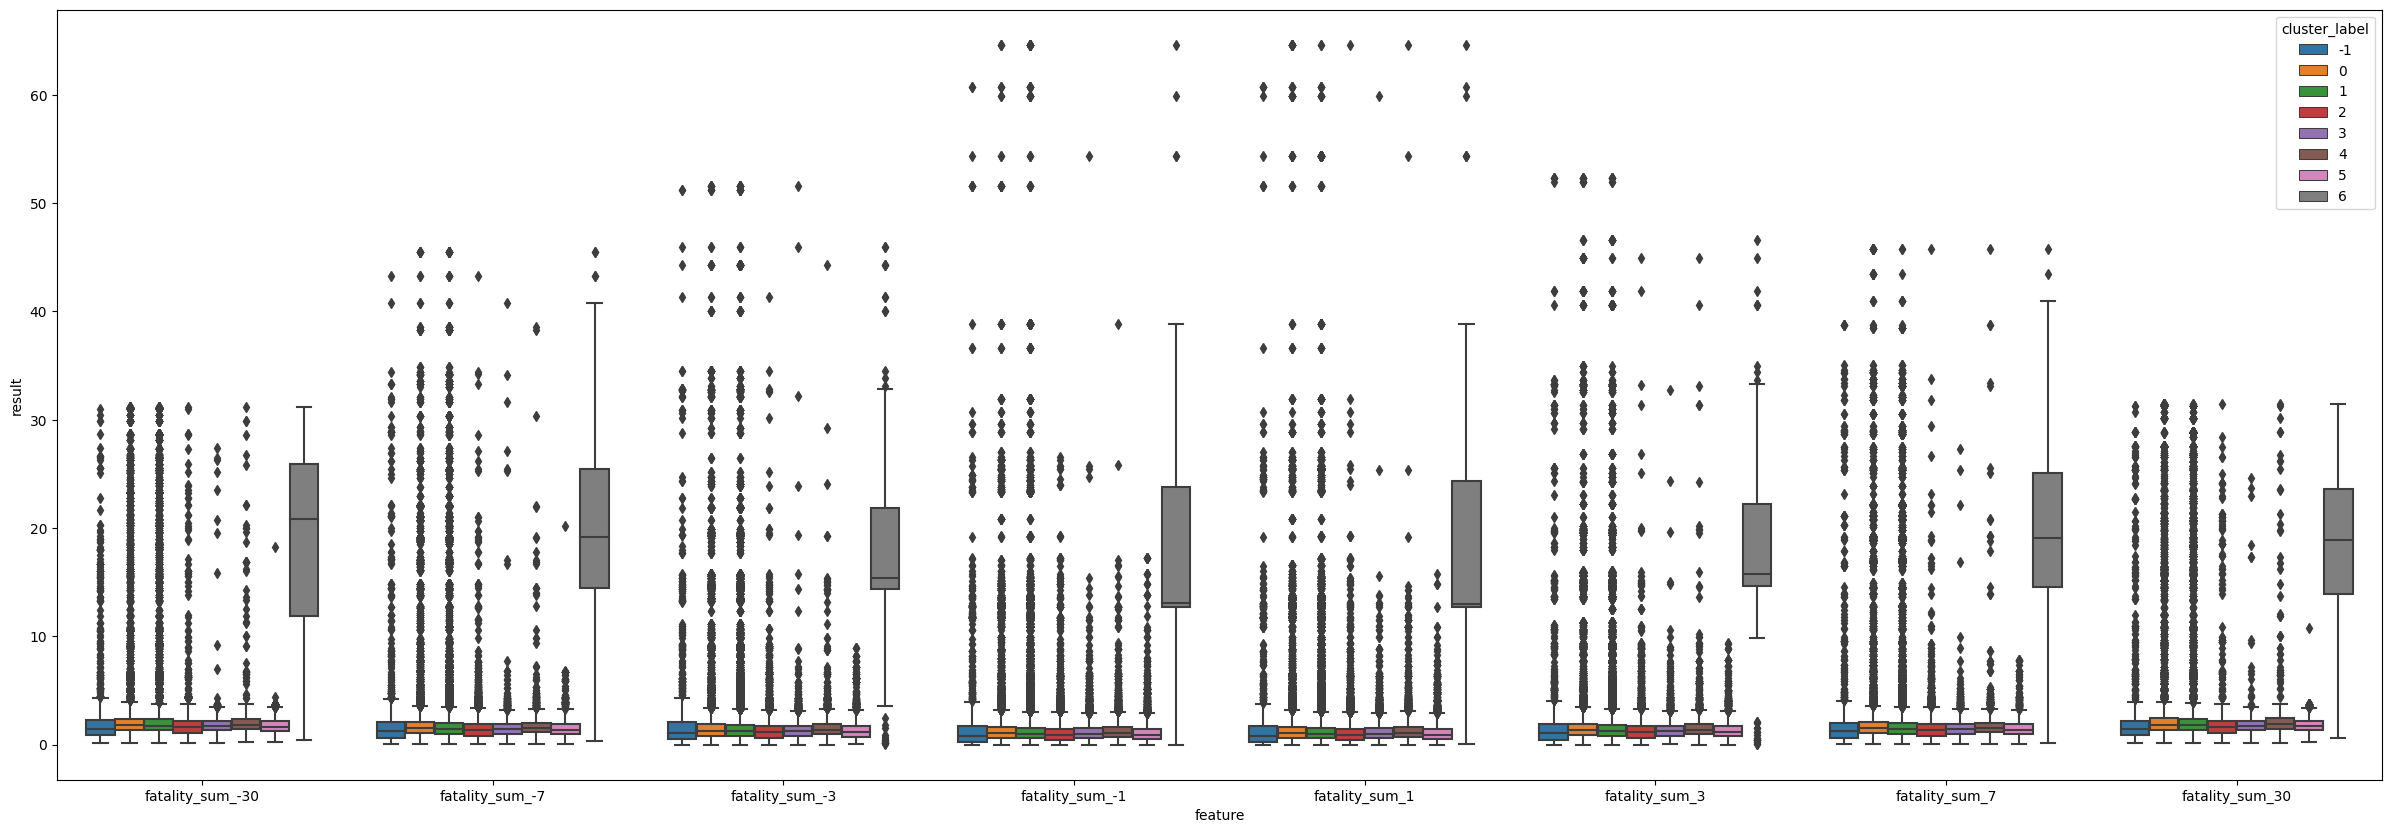

In [170]:
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.boxplot(data=data_cluster_subset, x='feature', y='result', hue= 'cluster_label', ax = ax)

### Level7: fatality sum admin1

In [171]:
data_cluster_subset = data_cluster_reshape.loc[data_cluster_reshape.feature.str.match('^fatality_sum_admin1_[-]?[0-9]{1,2}')]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['i

<AxesSubplot:xlabel='feature', ylabel='result'>

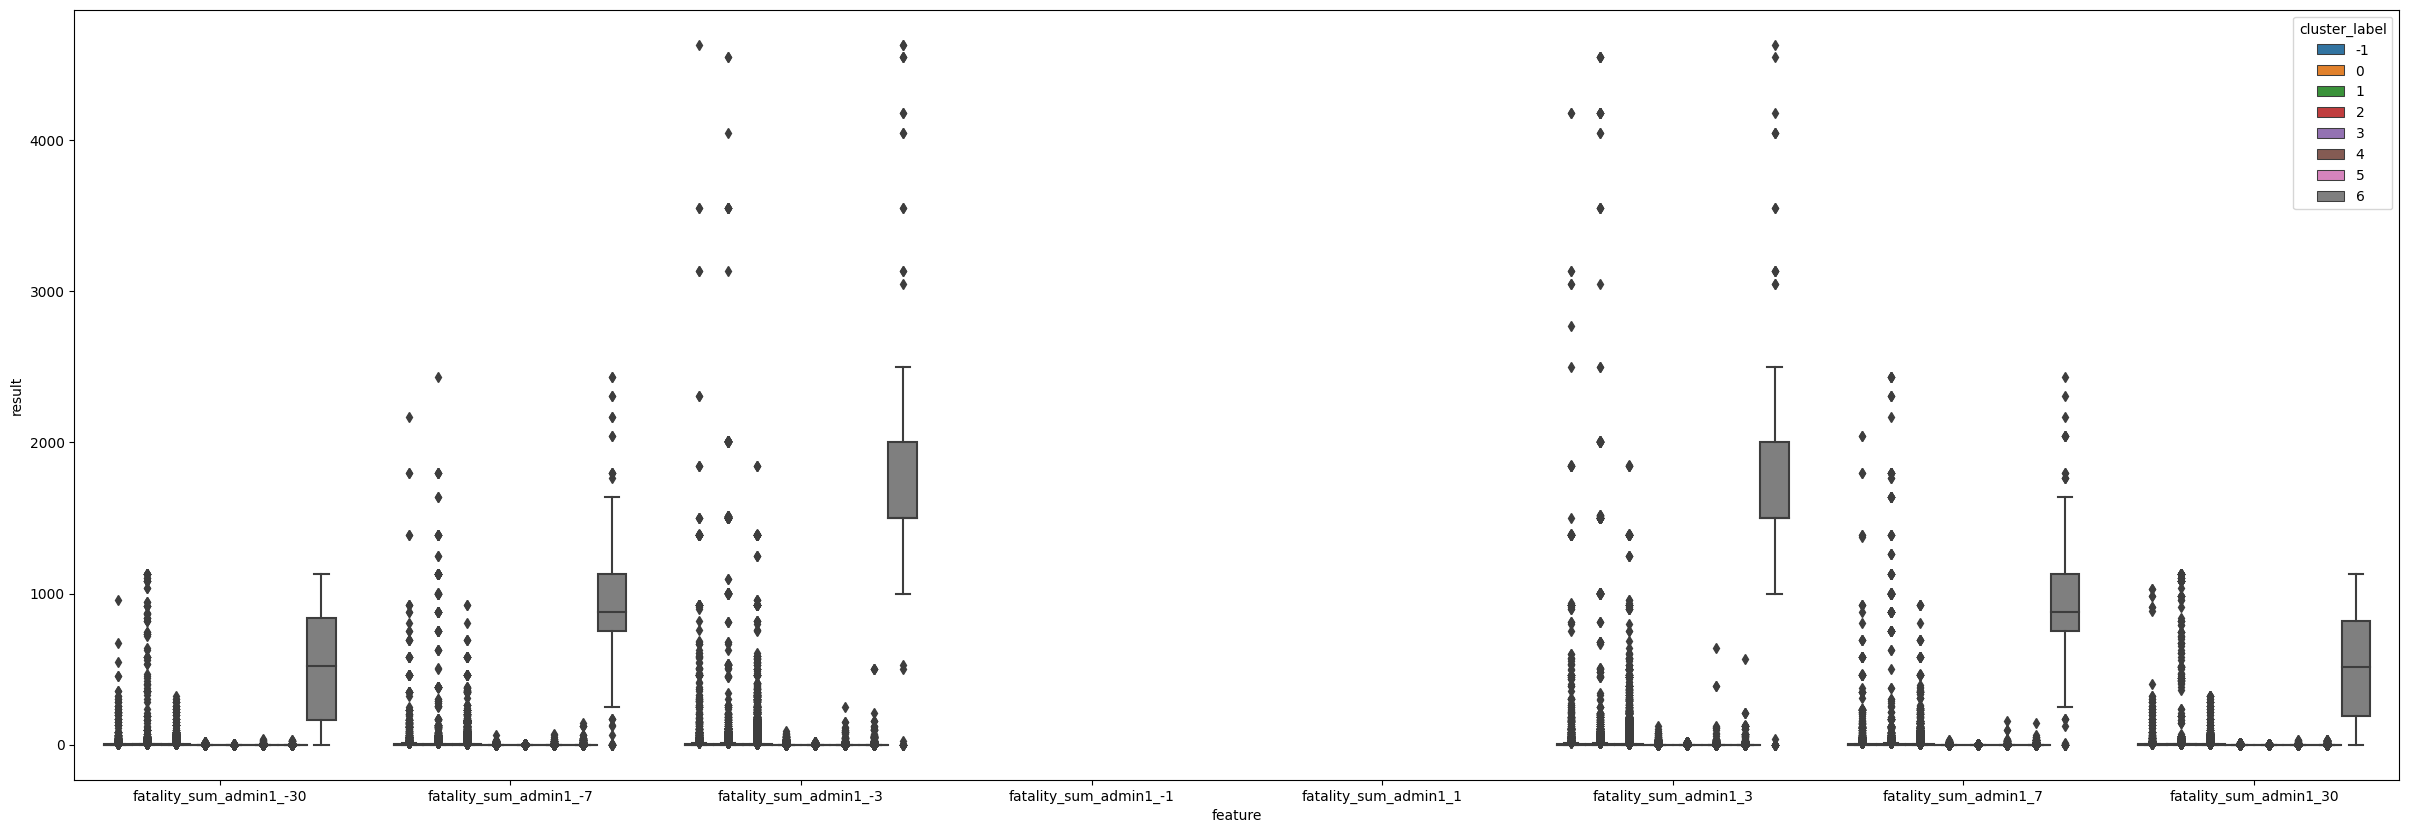

In [172]:
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.boxplot(data=data_cluster_subset, x='feature', y='result', hue= 'cluster_label', ax = ax)

### Level8: fatality sum admin2

In [173]:
data_cluster_subset = data_cluster_reshape.loc[data_cluster_reshape.feature.str.match('^fatality_sum_admin2_[-]?[0-9]{1,2}')]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, in

<AxesSubplot:xlabel='feature', ylabel='result'>

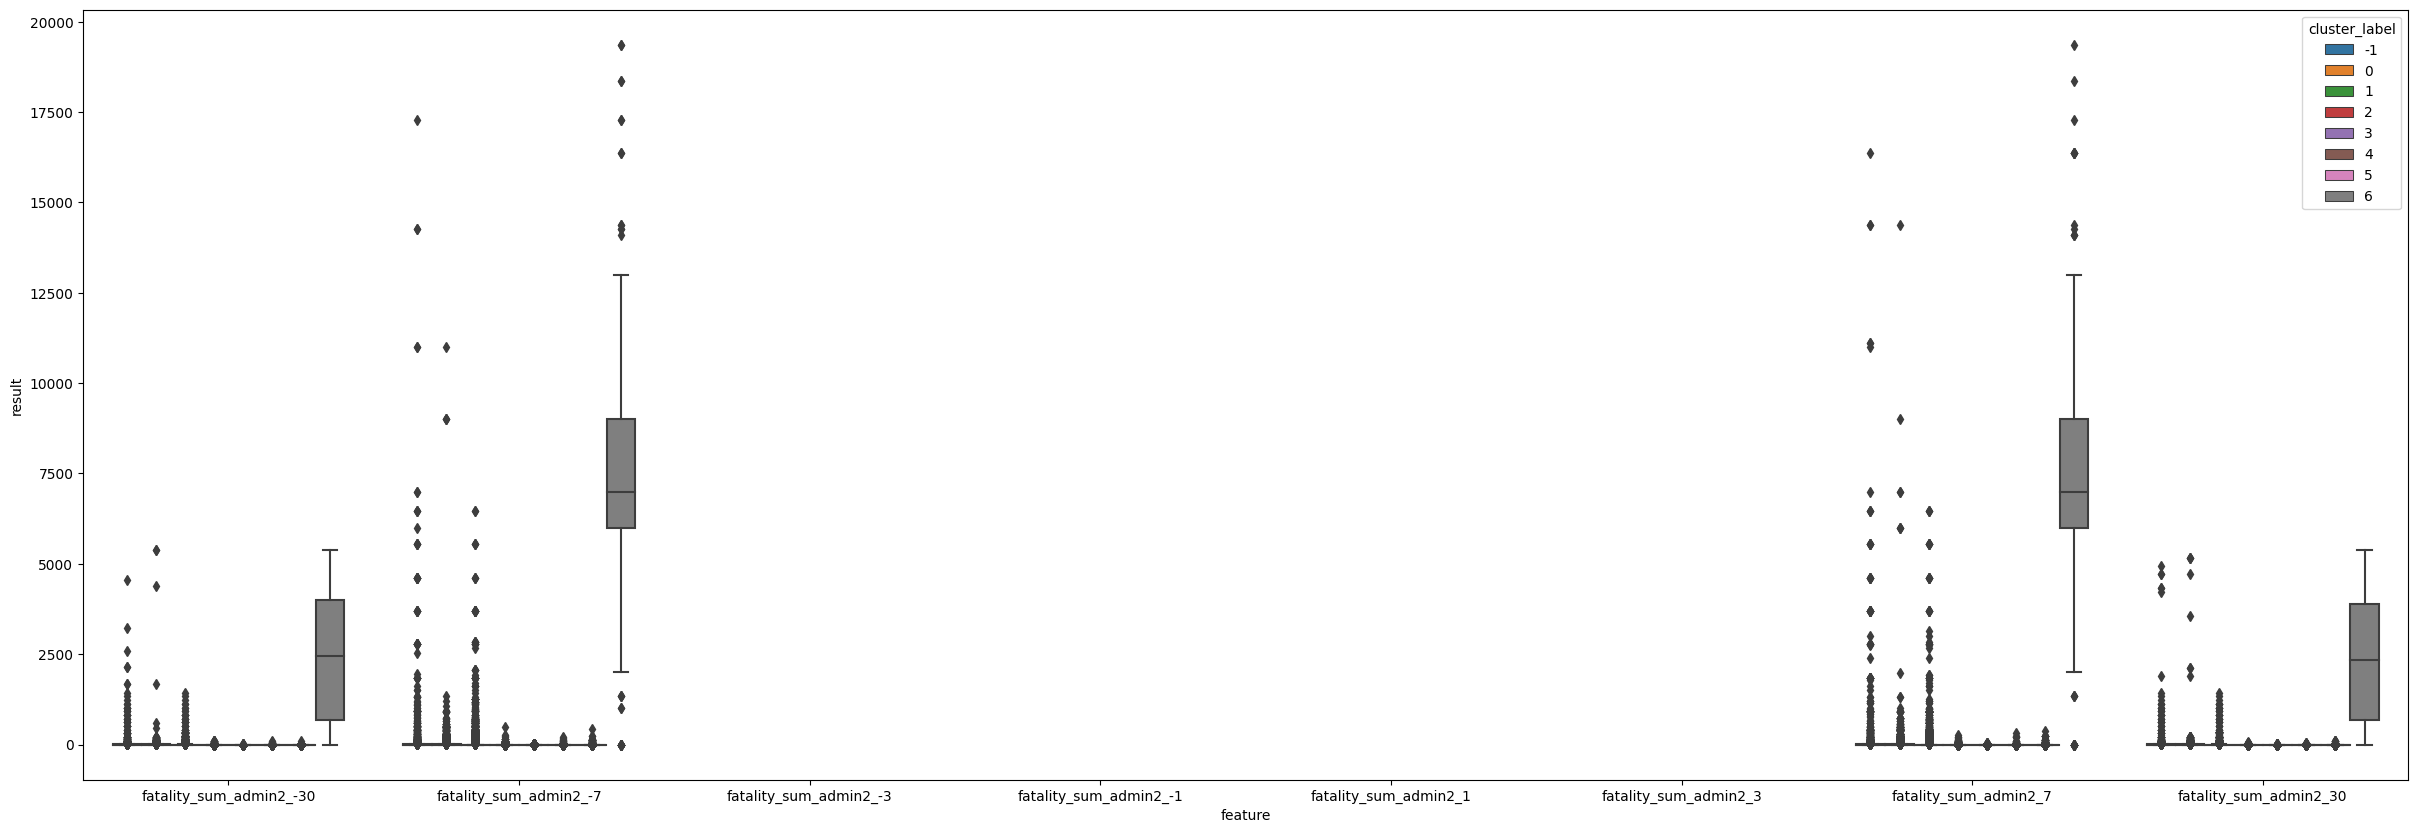

In [174]:
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.boxplot(data=data_cluster_subset, x='feature', y='result', hue= 'cluster_label', ax = ax)

### Level9: fatality sum actor1

In [175]:
data_cluster_subset = data_cluster_reshape.loc[data_cluster_reshape.feature.str.match('^fatality_sum_actor1_[-]?[0-9]{1,2}')]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in mu

<AxesSubplot:xlabel='feature', ylabel='result'>

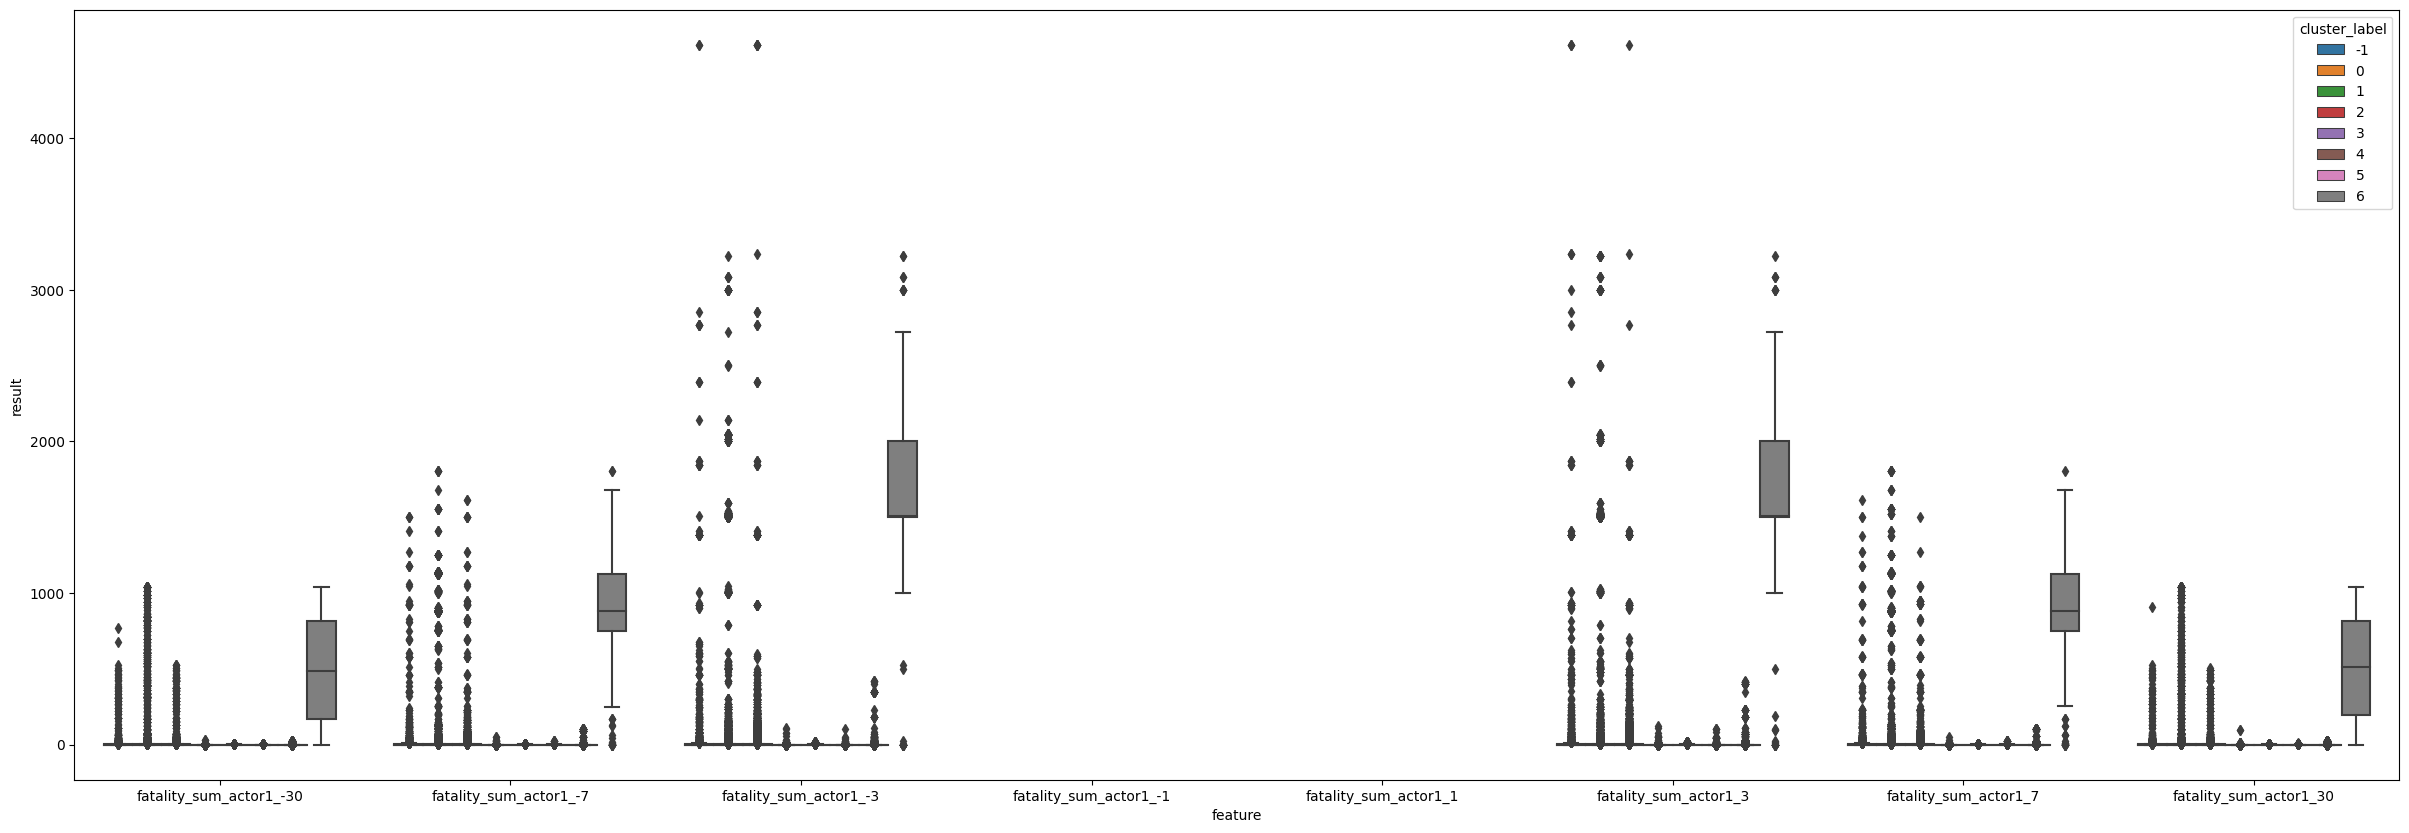

In [176]:
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.boxplot(data=data_cluster_subset, x='feature', y='result', hue= 'cluster_label', ax = ax)

### Level10: fatality sum actor1 & interaction

In [177]:
data_cluster_subset = data_cluster_reshape.loc[data_cluster_reshape.feature.str.match('^fatality_sum_actor1_inter_[-]?[0-9]{1,2}')]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, in

<AxesSubplot:xlabel='feature', ylabel='result'>

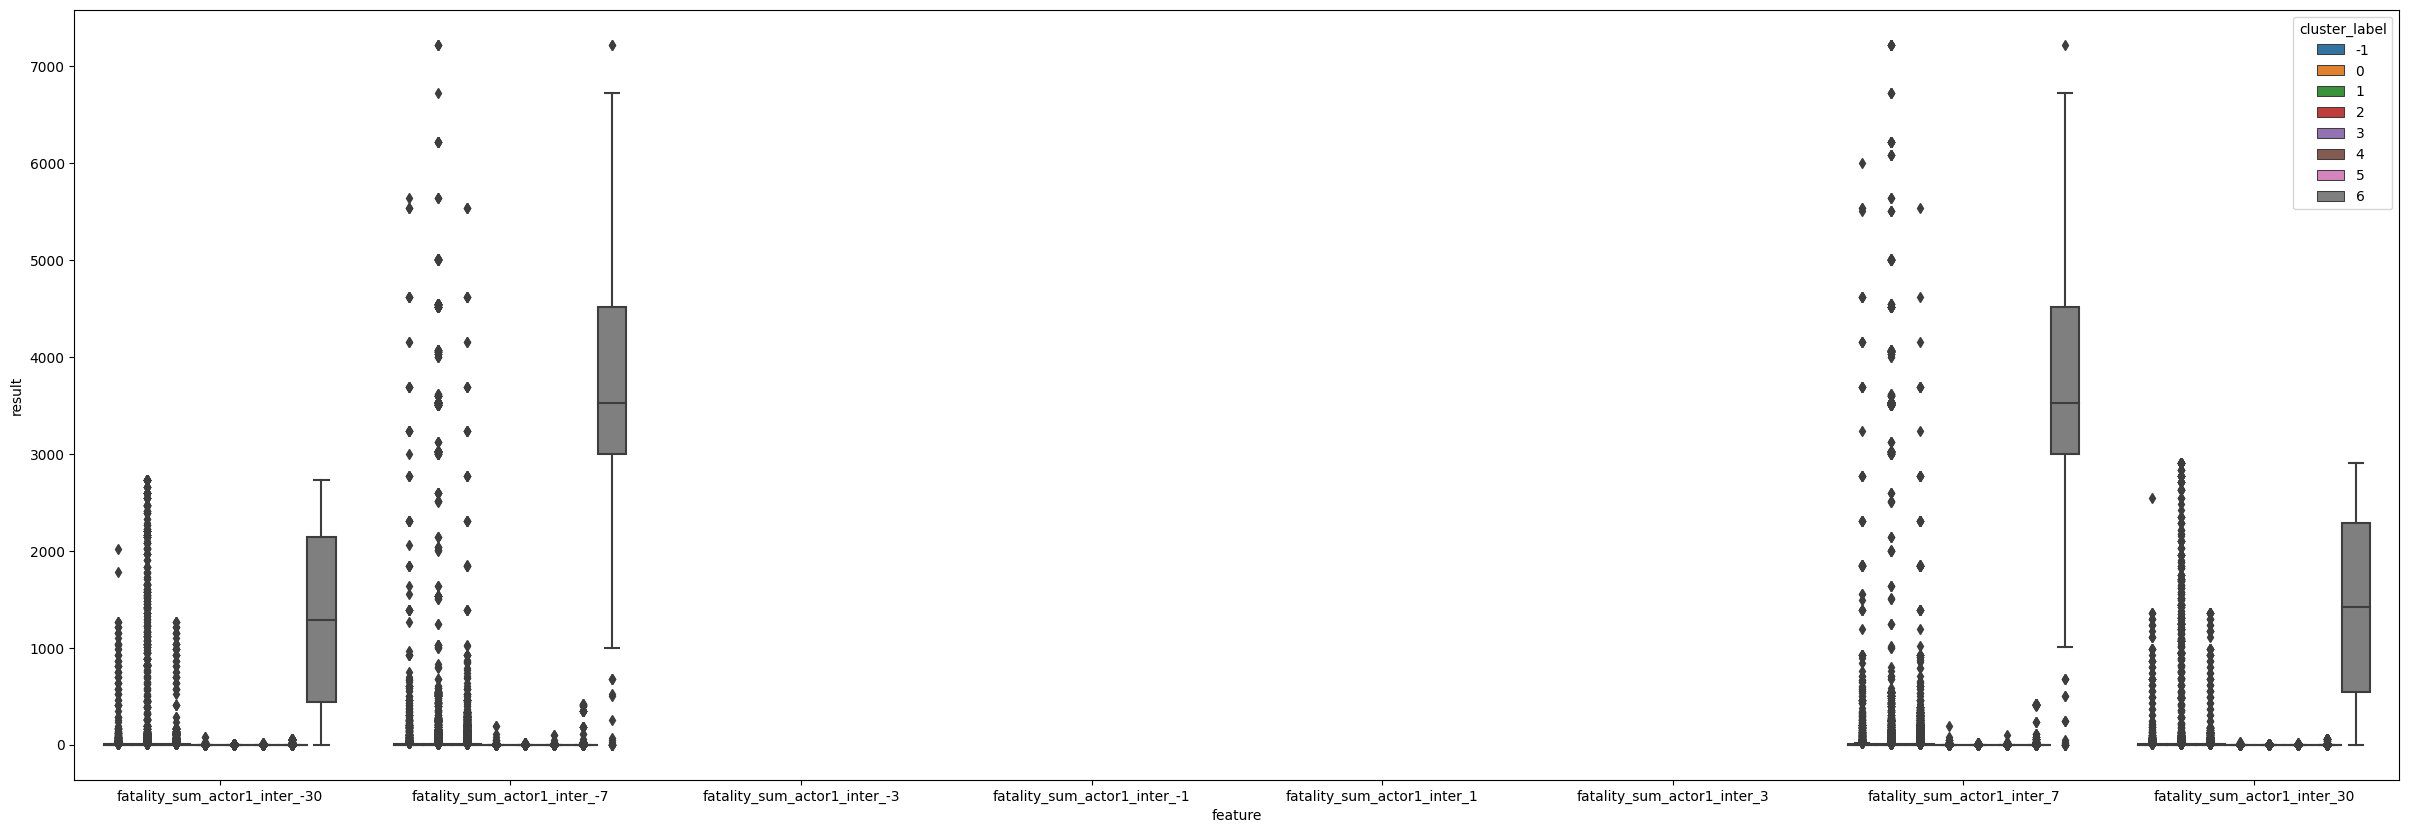

In [178]:
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.boxplot(data=data_cluster_subset, x='feature', y='result', hue= 'cluster_label', ax = ax)